In [1]:
#Importing libraries that we will be using
%matplotlib inline
import statsmodels.api as sm
import numpy as np 
import scipy
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings(action="ignore")
import seaborn as sns

In [2]:
#Reading our data
df=pd.read_csv('../data/AdSmartABdata.csv')
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


# Data Preparation

In [3]:
#Adding scripts path
import sys
sys.path.insert(0,'../scripts/')
from data_preProcess import data_preProcess
from data_info import dataframeInfo 
from data_visualization import exploration

In [4]:
# object creation
data_preProcess = data_preProcess(df)
data_info = dataframeInfo(df)

In [5]:
# getting data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [6]:
# getting missing value column with percentage
data_info.find_column_based_missing_percentage()

,total_missing_values,missing_percentage
auction_id,0,0.0 %
experiment,0,0.0 %
date,0,0.0 %
hour,0,0.0 %
device_make,0,0.0 %
platform_os,0,0.0 %
browser,0,0.0 %
yes,0,0.0 %
no,0,0.0 %


In [7]:
# finding duplicate rows
data_info.find_duplicates()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no


In [8]:
# find unique value counts on columns
data_info.find_dataframe_columns_unique_value_count()

,Unique Value Count
experiment,2
yes,2
no,2
platform_os,3
date,8
browser,15
hour,24
device_make,270
auction_id,8077


In [10]:
# finding the size and shape
df.shape

(8077, 9)

In [11]:
# find memory usage of each column
data_info.find_memory_usage()

Current DataFrame Memory Usage of columns is :


Index            128
auction_id     64616
experiment     64616
date           64616
hour           64616
device_make    64616
platform_os    64616
browser        64616
yes            64616
no             64616
dtype: int64

In [13]:
# correlation among columns
data_info.find_matrix_correlation()

,hour,platform_os,yes,no
hour,1.000000,0.000062,0.013481,-0.021725
platform_os,0.000062,1.000000,0.054305,0.046941
yes,0.013481,0.054305,1.000000,-0.083098
no,-0.021725,0.046941,-0.083098,1.000000


#### * Data is clean no further operation

# Data Exploration

In [15]:
# accessing data
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [17]:
# getting dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [19]:
# getting dataframe columns list
df.columns.tolist()

['auction_id',
 'experiment',
 'date',
 'hour',
 'device_make',
 'platform_os',
 'browser',
 'yes',
 'no']

In [20]:
# getting shape
df.shape

(8077, 9)

In [21]:
# copying dataframe
response = df.copy(deep=True)

In [22]:
# getting users who only selects yes or no
response = response[response['yes'] == 1].append(response[response['no'] == 1])
response.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
45,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,0
65,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1,0
89,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1,0


In [23]:
# getting size of the new dataframe
response.shape

(1243, 9)

In [24]:
# finding the control group
control_df = response[response['experiment'] == 'control']
control_df.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
45,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,0
100,0332a7f7-0336-4d48-96ad-75da00d916c0,control,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
118,03948b84-b5b1-4f26-81fc-e953218aef1a,control,2020-07-09,20,Samsung SM-G930F,6,Facebook,1,0
157,04b69bd8-4849-4489-adcf-08b96a265c40,control,2020-07-07,15,Generic Smartphone,6,Chrome Mobile,1,0


In [25]:
# accessing control df shape
control_df.shape

(586, 9)

#### * there are 586 peoples with control group

In [26]:
# finding the exposed group
exposed_df = response[response['experiment'] == 'exposed']
exposed_df.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
65,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1,0
89,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1,0
128,03ee1780-1fa3-4bec-926c-d543a81a6653,exposed,2020-07-04,11,Samsung SM-G981B,6,Chrome Mobile WebView,1,0
144,046644f4-b30c-48f9-b069-f804a97b77d9,exposed,2020-07-05,2,Generic Smartphone,6,Chrome Mobile WebView,1,0


In [27]:
# accessing exposed group
exposed_df.shape

(657, 9)

#### * there are 657 peoples with exposed group

In [30]:
# grouping by experiment and its count
experiment_groups = response.groupby(['experiment']).agg({'experiment': ['count']})
experiment_groups.columns = ['count']
experiment_groups = experiment_groups.reset_index()
experiment_groups

,experiment,count
0,control,586
1,exposed,657


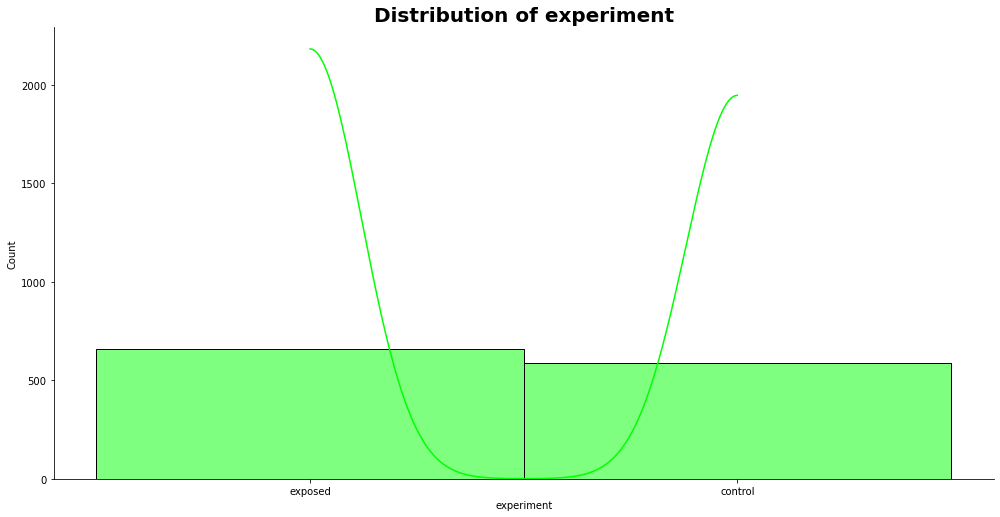

In [70]:
# histogram visual
fig = exploration.plot_hist(response,'experiment','lime')

#### * There are more number of exposed groups

In [32]:
# grouping by date and its count
date_data = response.groupby(['date']).agg({'date': ['count']})
date_data.columns = ['count']
date_data = date_data.reset_index()
date_data

,date,count
0,2020-07-03,325
1,2020-07-04,159
2,2020-07-05,117
3,2020-07-06,74
4,2020-07-07,83
5,2020-07-08,177
6,2020-07-09,184
7,2020-07-10,124


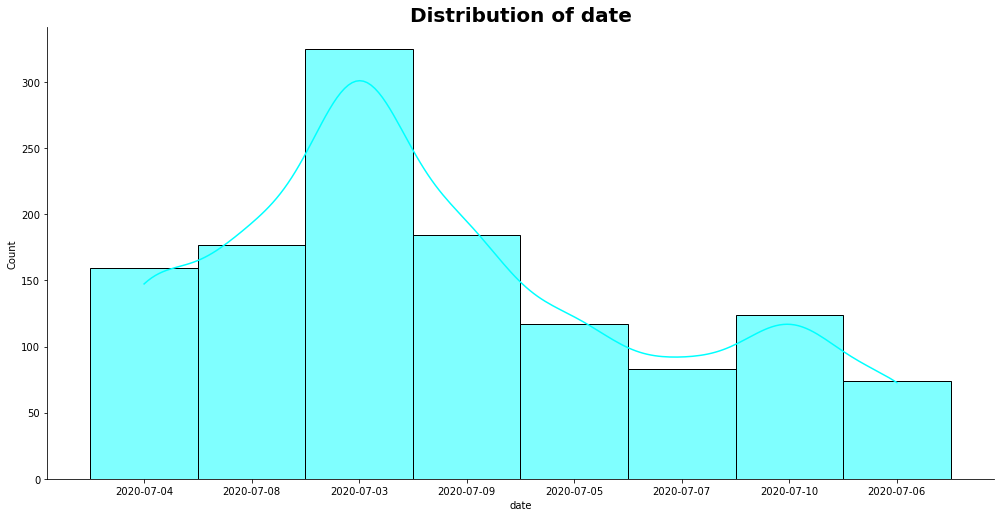

In [33]:
fig = exploration.plot_hist(response,'date','cyan')

#### * There is much reaction for the Ad on day 2020-07-03 (July 03 / 2020)

In [34]:
# grouping by hour and its count
hour_data = response.groupby(['hour']).agg({'hour': ['count']})
hour_data.columns = ['count']
hour_data = hour_data.reset_index()
hour_data

,hour,count
0,0,31
1,1,32
2,2,33
3,3,44
4,4,46
5,5,49
6,6,50
7,7,59
8,8,67
9,9,57


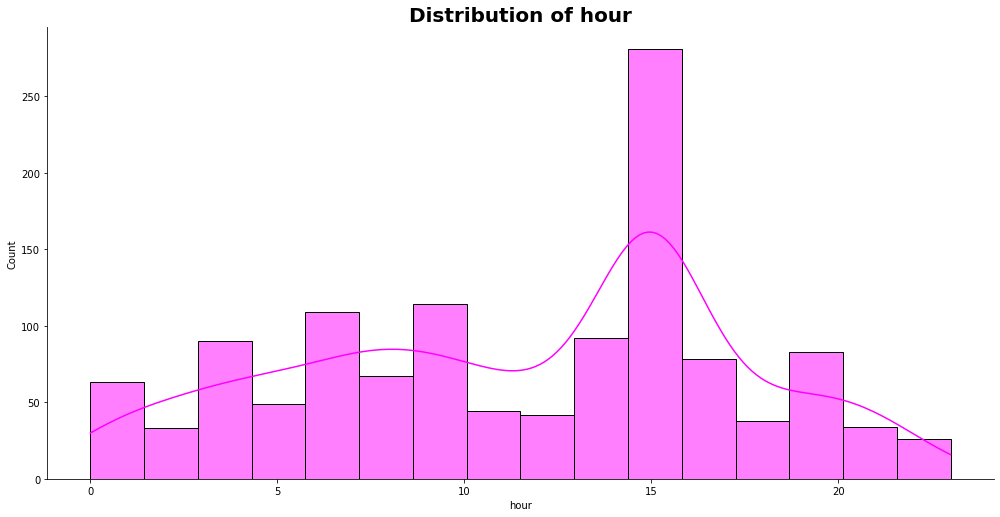

In [35]:
fig = exploration.plot_hist(response,'hour','magenta')

#### * There is much reaction for the Ad at the 15 hrs mark

In [37]:
# grouping by device_make and its count
device_data = response.groupby(['device_make']).agg({'device_make': ['count']})
device_data.columns = ['count']
device_data = device_data.reset_index()
device_data.head()

,device_make,count
0,A0001,1
1,ANE-LX1,6
2,CLT-L09,5
3,DLI-L22,1
4,E5823,1


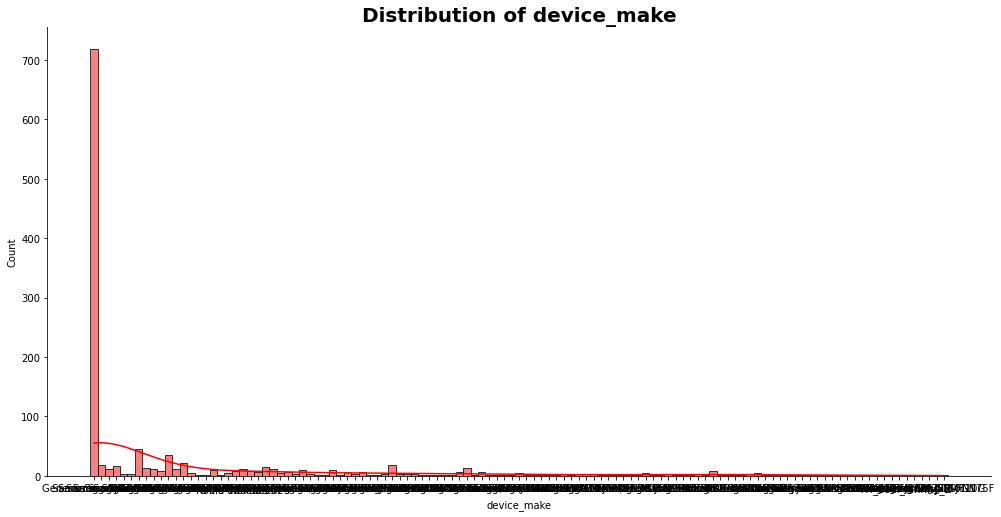

In [38]:
fig = exploration.plot_hist(response,'device_make','red')

#### * Generic smartphone takes the huge role at the Ad reaction platform

In [39]:
# grouping by browser and its count
browser_types = response['browser'].value_counts()
browser_types.columns = ['count']
browser_types = browser_types.reset_index()
browser_types

,index,browser
0,Chrome Mobile,695
1,Chrome Mobile WebView,227
2,Facebook,156
3,Samsung Internet,145
4,Mobile Safari,14
5,Mobile Safari UI/WKWebView,3
6,Chrome,2
7,Chrome Mobile iOS,1


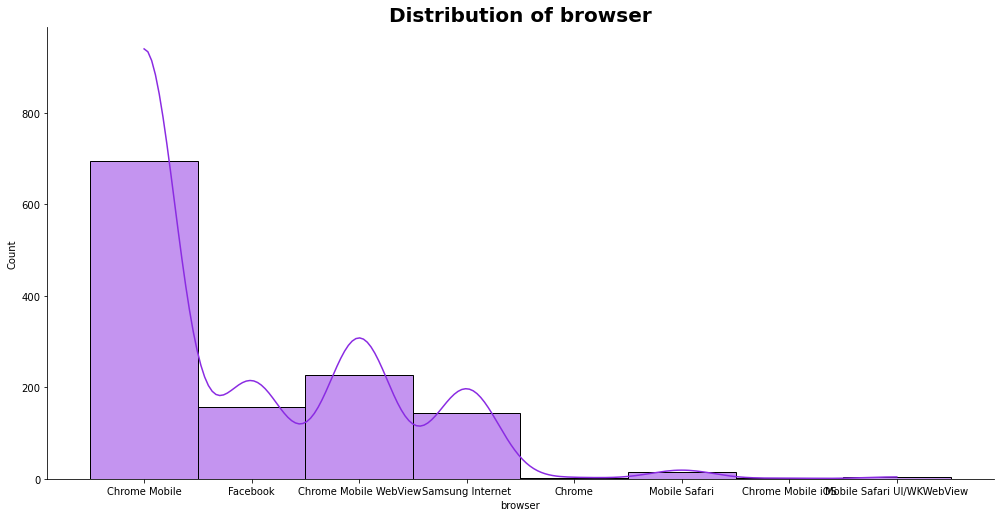

In [40]:
fig = exploration.plot_hist(response,'browser','blueviolet')

#### * Chrome Mobile browser is most widely used when accessing the Ad

In [41]:
# grouping by platform and its count
browser_types = response['platform_os'].value_counts()
browser_types.columns = ['count']
browser_types = browser_types.reset_index()
browser_types

,index,platform_os
0,6,1226
1,5,17


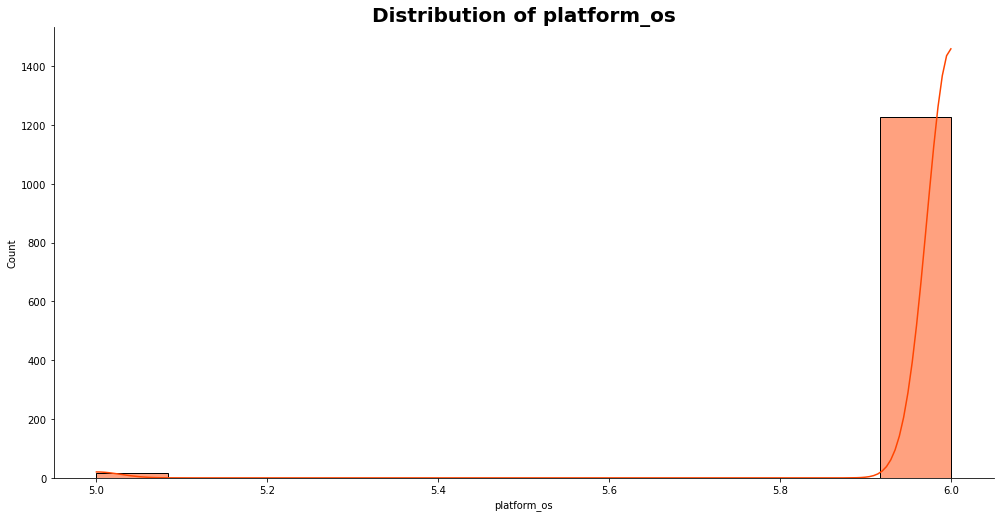

In [42]:
fig = exploration.plot_hist(response,'platform_os','orangered')bb

#### * Platform 6 is most widely used version on the reaction (latest)

In [43]:
# group by date and aggriagte all columns 
date_group_df = response.groupby('date').agg({'experiment':'count','hour':'sum','yes':'sum', 'no':'sum'})
date_group_df

,experiment,hour,yes,no
date,,,,
2020-07-03,325,4215,147,178
2020-07-04,159,1694,76,83
2020-07-05,117,1124,52,65
2020-07-06,74,417,35,39
2020-07-07,83,934,38,45
2020-07-08,177,2817,85,92
2020-07-09,184,2179,85,99
2020-07-10,124,940,54,70


In [46]:
# group by browser and aggregate all columns
browser_group_df = response.groupby('browser').agg(
    {'experiment': 'count', 'hour': 'sum', 'yes': 'sum', 'no':'sum'})
browser_group_df

,experiment,hour,yes,no
browser,,,,
Chrome,2,27,1,1
Chrome Mobile,695,8041,314,381
Chrome Mobile WebView,227,2403,116,111
Chrome Mobile iOS,1,11,1,0
Facebook,156,1957,69,87
Mobile Safari,14,123,4,10
Mobile Safari UI/WKWebView,3,46,0,3
Samsung Internet,145,1712,67,78


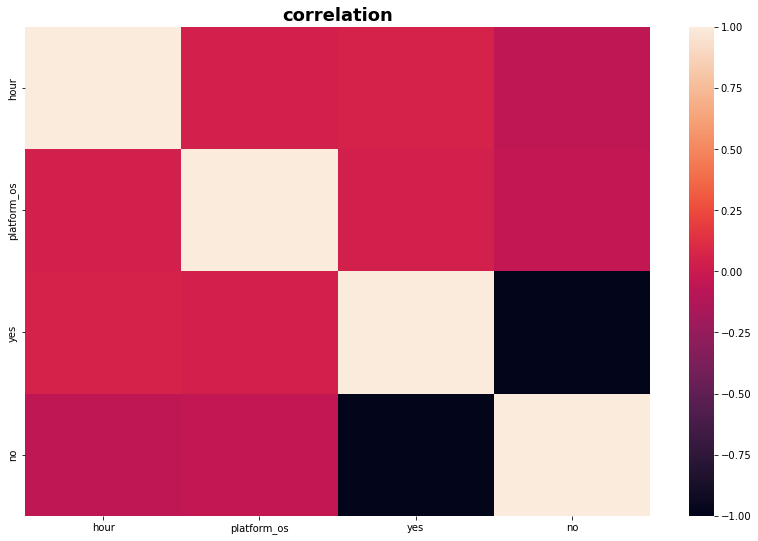

In [47]:
# correlation
exploration.plot_heatmap_from_correlation(response.corr(), "correlation")

In [48]:
#plotting distribution of the control group
df1 = control_df[control_df['yes'] == 1].drop(['yes','no'], axis = 1)
df1['response'] = 1
df2 = control_df[control_df['no'] == 1].drop(['yes','no'], axis = 1)
df2['response'] = 0
control_plot_df = df1.append(df2).reset_index(drop=True)
control_plot_df.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,response
0,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1
1,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1
2,0332a7f7-0336-4d48-96ad-75da00d916c0,control,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1
3,03948b84-b5b1-4f26-81fc-e953218aef1a,control,2020-07-09,20,Samsung SM-G930F,6,Facebook,1
4,04b69bd8-4849-4489-adcf-08b96a265c40,control,2020-07-07,15,Generic Smartphone,6,Chrome Mobile,1


In [49]:
#plotting distribution of the exposed group
df1 = exposed_df[exposed_df['yes'] == 1].drop(['yes','no'], axis = 1)
df1['response'] = 1
df2 = exposed_df[exposed_df['no'] == 1].drop(['yes','no'], axis = 1)
df2['response'] = 0
exposed_plot_df = df1.append(df2).reset_index(drop=True)
exposed_plot_df.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,response
0,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1
1,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1
2,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1
3,03ee1780-1fa3-4bec-926c-d543a81a6653,exposed,2020-07-04,11,Samsung SM-G981B,6,Chrome Mobile WebView,1
4,046644f4-b30c-48f9-b069-f804a97b77d9,exposed,2020-07-05,2,Generic Smartphone,6,Chrome Mobile WebView,1


In [63]:
# group by responses and there count for control data
control_yes_data = control_plot_df.groupby(['response']).agg({'response': ['count']})
control_yes_data.columns = ['count']
control_yes_data = control_yes_data.reset_index()
control_yes_data

,response,count
0,0,322
1,1,264


In [64]:
# group by responses and there count for exposed data
exposed_yes_data = exposed_plot_df.groupby(['response']).agg({'response': ['count']})
exposed_yes_data.columns = ['count']
exposed_yes_data = exposed_yes_data.reset_index()
exposed_yes_data

,response,count
0,0,349
1,1,308


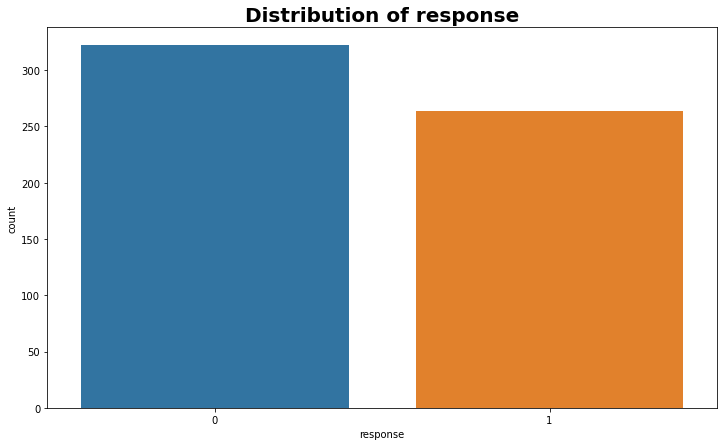

In [65]:
exploration.plot_count(control_plot_df, 'response')

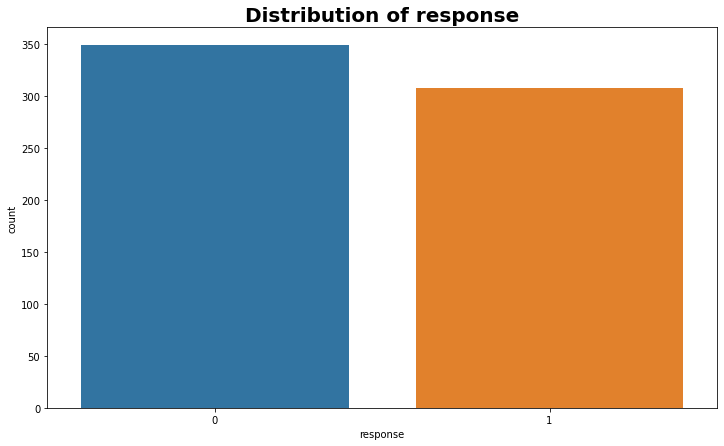

In [69]:
exploration.plot_count(exposed_plot_df, 'response')

### * There is a obviously a shift in answering yes for the exposed group than the control group (the smart Ad works well)

In [71]:
# saving control data
control_plot_df.to_csv('../data/control_df.csv')

In [72]:
# saving exposed data
exposed_plot_df.to_csv('../data/exposed_df.csv')

#################################################################################